##### IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##### LOAD DATA

In [2]:
df = pd.read_csv(r"C:\Users\layas\Desktop\Laya\Project Files\JFK-Flight-Delay-Prediction\data.csv")

In [3]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

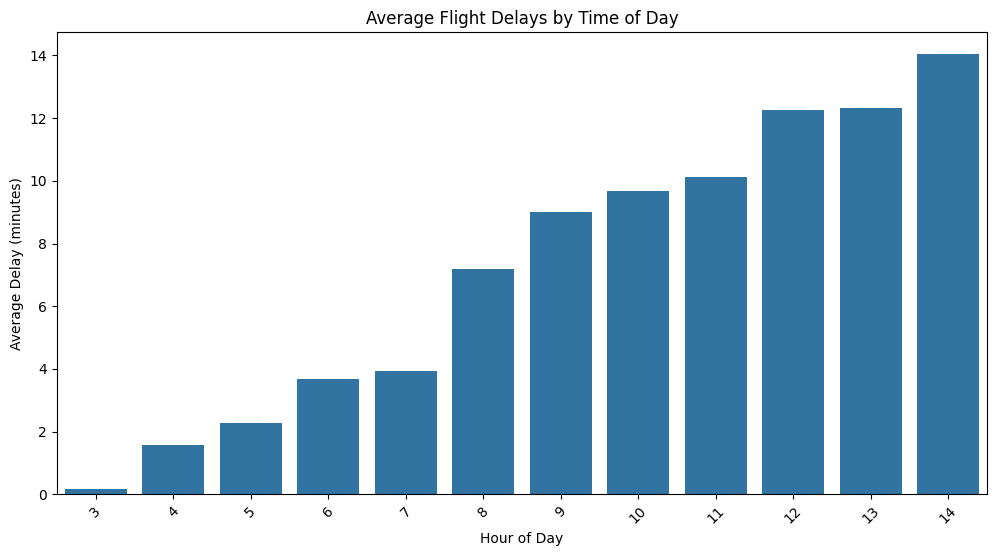

In [4]:
# Convert CRSDepTime to hours
df['DepHour'] = df['CRS_DEP_M'] // 100

# Calculate average delay by hour
average_delays_by_hour = df.groupby('DepHour')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_delays_by_hour, x='DepHour', y='DEP_DELAY')
plt.title('Average Flight Delays by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

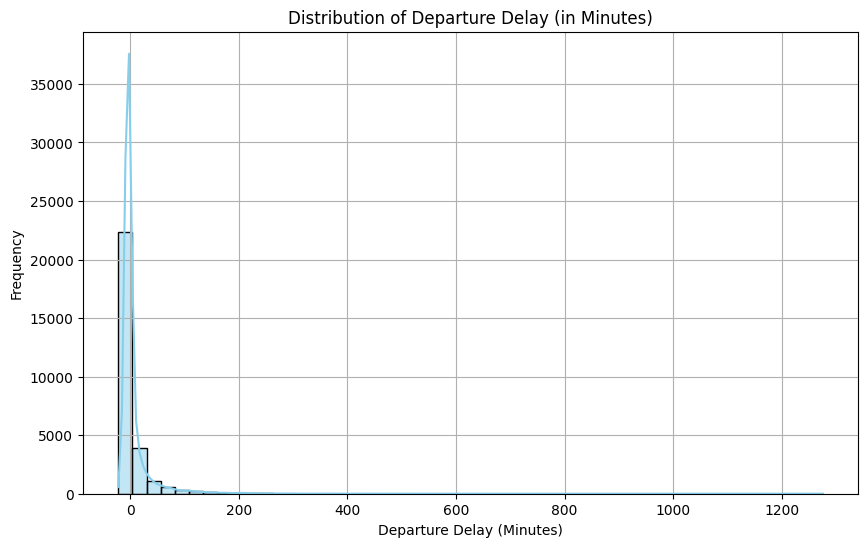

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Departure Delay (in Minutes)')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


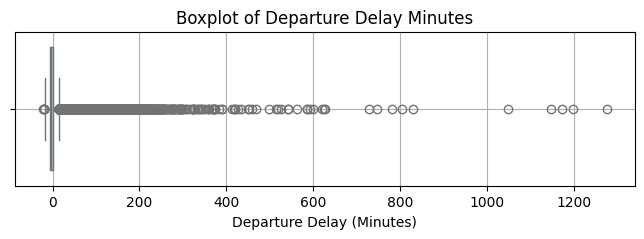

In [7]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['DEP_DELAY'], color='lightgreen')
plt.title('Boxplot of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.grid(True)
plt.show()


In [ ]:
df_outlier= df[ df['DEP_DELAY']<=700 ]


In [14]:
Q3= df['DEP_DELAY'].quantile(0.75)
Q1= df['DEP_DELAY'].quantile(0.25)
IQR= Q3-Q1
UL= Q3 + (1.5)*IQR
LL= Q1 - (1.5)*IQR
df_IQR= df[ (df['DEP_DELAY']>=LL) & (df['DEP_DELAY']<=UL) ]

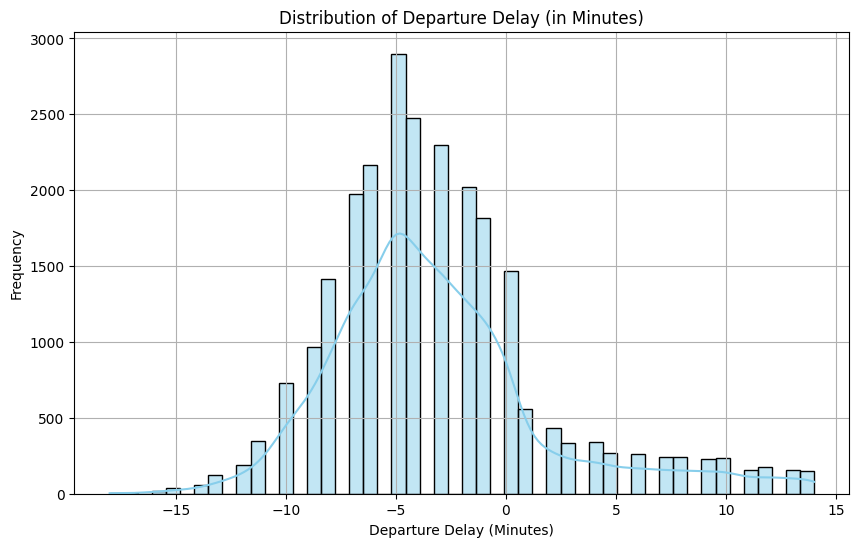

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_IQR['DEP_DELAY'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Departure Delay (in Minutes)')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


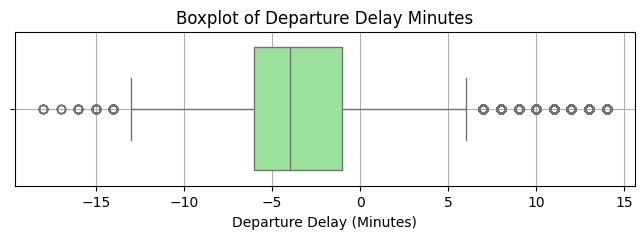

In [16]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_IQR['DEP_DELAY'], color='lightgreen')
plt.title('Boxplot of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.grid(True)
plt.show()
